# Stability of SSPALS: Range, t0, FWHM, and DF

### Configure Ipython

In [1]:
#import python packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticks
%matplotlib inline
#import custom packages
import oskar

### Import Data

In [2]:
rid = '20160321_185959'
h5 = oskar.H5Data(rid)              # data
h5.load_log()
out_dire = h5.out_dire("Stability") # output

In [3]:
#read data
allDF = h5.load_av(verbose=True)
allDF.head()

Loaded: av_SSPALS.dat


,DATETIME,ACQUIRE,END,ERROR,LOOP,START,VAR:DLY_EA,VAR:IR,VAR:UV,VAR:VOL_u100,...,DF_std,DF_sem,Range_reps,Range_mean,Range_std,Range_sem,FWHM_reps,FWHM_mean,FWHM_std,FWHM_sem
SQUID,,,,,,,,,,,,,,,,,,,,,
1,2016-03-21 19:00:11,59.827422,3.541432e+09,0,1,3.541432e+09,5.950000e-07,735.6035,243.2,2000,...,0.005092,0.000657,60,0.436702,0.014851,0.001917,60,1.113585e-08,5.621691e-10,7.257571e-11
2,2016-03-21 19:01:23,59.841423,3.541432e+09,0,1,3.541432e+09,5.950000e-07,758.6286,243.2,2000,...,0.005936,0.000766,60,0.435881,0.018569,0.002397,60,1.102283e-08,6.053450e-10,7.814970e-11
3,2016-03-21 19:02:35,59.841423,3.541432e+09,0,1,3.541432e+09,5.950000e-07,741.4379,243.2,2000,...,0.006945,0.000897,60,0.438434,0.018403,0.002376,60,1.098999e-08,5.945526e-10,7.675641e-11
4,2016-03-21 19:03:44,59.828422,3.541432e+09,0,1,3.541432e+09,5.950000e-07,750.7000,243.2,2000,...,0.005884,0.000760,60,0.443368,0.017320,0.002236,60,1.097148e-08,5.284125e-10,6.821777e-11
5,2016-03-21 19:04:53,59.840423,3.541432e+09,0,2,3.541432e+09,5.950000e-07,741.4379,243.2,2000,...,0.005821,0.000751,60,0.438181,0.018770,0.002423,60,1.093621e-08,5.239819e-10,6.764578e-11


In [4]:
#calculate time elapsed
allDF['ELAPSED'] = (allDF.DATETIME - allDF.DATETIME.min())/ np.timedelta64(1, 'h')

### Plot Data

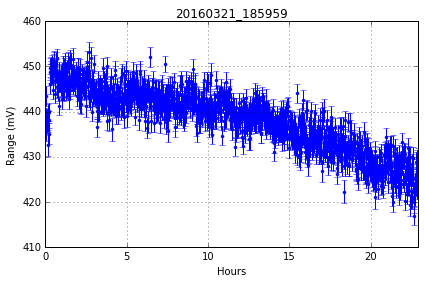

In [5]:
#plot setup
fig, ax1 = plt.subplots()
#plot
X = 'ELAPSED'
Y = 'Range'
rescale = 1e+3

x1 = allDF[X].values
y1 = allDF[Y+'_mean'].values*rescale
y1err = allDF[Y+'_sem'].values*rescale
ax1.errorbar(x1, y1, yerr=y1err, fmt='.b')

#format
ax1.set_xlim(np.nanmin(x1), np.nanmax(x1))
ax1.grid(True)

#labels
ax1.set_ylabel("Range (mV)");
ax1.set_xlabel("Hours");
ax1.set_title(rid);

#save data
plt.tight_layout();
fileout = os.path.join(out_dire, Y+'_stab.png')
plt.savefig(fileout, dpi=300)

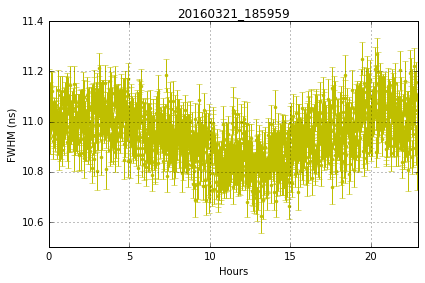

In [6]:
#plot setup
fig, ax1 = plt.subplots()
#plot
X = 'ELAPSED'
Y = 'FWHM'
rescale = 1e+9

x1 = allDF[X].values
y1 = allDF[Y+'_mean'].values*rescale
y1err = allDF[Y+'_sem'].values*rescale
ax1.errorbar(x1, y1, yerr=y1err, fmt='.y')

#format
ax1.set_xlim(np.nanmin(x1), np.nanmax(x1))
ax1.grid(True)

#labels
ax1.set_ylabel("FWHM (ns)");
ax1.set_xlabel("Hours");
ax1.set_title(rid);

#save data
plt.tight_layout();
fileout = os.path.join(out_dire, Y+'_stab.png')
plt.savefig(fileout, dpi=300)

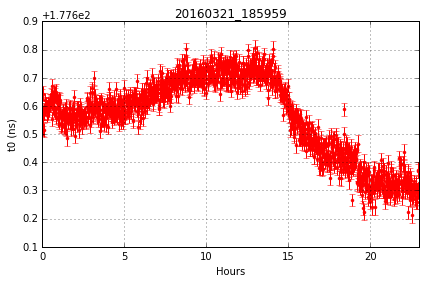

In [7]:
#plot setup
fig, ax1 = plt.subplots()
#plot
X = 'ELAPSED'
Y = 't0'
rescale = 1e+9

x1 = allDF[X].values
y1 = allDF[Y+'_mean'].values*rescale
y1err = allDF[Y+'_sem'].values*rescale
ax1.errorbar(x1, y1, yerr=y1err, fmt='.r')

#format
ax1.set_xlim(np.nanmin(x1), np.nanmax(x1))
ax1.grid(True)

#labels
ax1.set_ylabel("t0 (ns)");
ax1.set_xlabel("Hours");
ax1.set_title(rid);

#save data
plt.tight_layout();
fileout = os.path.join(out_dire, Y+'_stab.png')
plt.savefig(fileout, dpi=300)

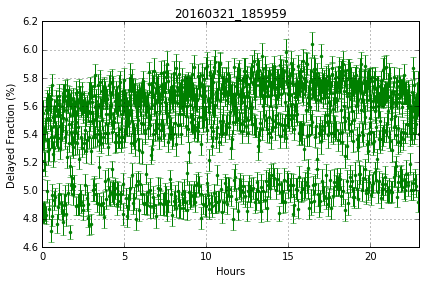

In [8]:
#plot setup
fig, ax1 = plt.subplots()
#plot
X = 'ELAPSED'
Y = 'DF'
rescale = 1e+2

x1 = allDF[X].values
y1 = allDF[Y+'_mean'].values*rescale
y1err = allDF[Y+'_sem'].values*rescale
ax1.errorbar(x1, y1, yerr=y1err, fmt='.g')

#format
ax1.set_xlim(np.nanmin(x1), np.nanmax(x1))
ax1.grid(True)

#labels
ax1.set_ylabel("Delayed Fraction (%)");
ax1.set_xlabel("Hours");
ax1.set_title(rid);

#save data
plt.tight_layout();
fileout = os.path.join(out_dire, Y+'_stab.png')
plt.savefig(fileout, dpi=300)